{{< pagebreak >}}

In [2]:
## %pip install seaborn
## %pip install statsmodels

In [3]:
#| echo: false

# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'vscode'
pio.templates.default = 'plotly'



# load the dataset
df = pd.read_csv("../../data/titanic/train.csv")
df = df.drop(columns = ['PassengerId'])

num_columns = df.select_dtypes(include=['int64', 'float64']).columns
cat_columns = df.select_dtypes(include=['object']).columns
target = 'Survived'

# Introduction
Describe the dataset.

# Problem Statement
Describe the problem. 
What are we trying to predict? 
Is there a baseline to measure against? 
Does prediction bring value? "So what?"

# Exploratory Data Analysis
1. Profile the dataset.

Check for correct data types, nulls, uniqueness, granularity and top value counts.

In [4]:
#| output: true
#| tbl-cap: Quality Check of All Fields

data_types = pd.DataFrame(df.dtypes, columns=['Data Type'] ).replace('object','String').replace('int64','Integer').replace('float64','Float')
null_pct = pd.DataFrame((df.isnull().mean()).map("{:.0%}".format) , columns=['Percent Null'] )
unique_counts = pd.DataFrame(df.nunique(), columns=['Unique Count'] )

summary_df = pd.concat([data_types, unique_counts, null_pct ],axis=1)
summary_df = summary_df

summary_df['Mode'] = [df[c].value_counts().head(1).index[0] for c in df.columns]
summary_df['Mode % of total'] = [df[c].value_counts(normalize=True).head(1).values[0] for c in df.columns]
summary_df['Mode % of total'] = summary_df['Mode % of total'].map("{:.0%}".format) 

summary_df[['Data Type','Mode','Mode % of total','Unique Count','Percent Null']].sort_values(by = 'Data Type')


,Data Type,Mode,Mode % of total,Unique Count,Percent Null
Age,Float,24.0,4%,88,20%
Fare,Float,8.05,5%,248,0%
Survived,Integer,0,62%,2,0%
Pclass,Integer,3,55%,3,0%
SibSp,Integer,0,68%,7,0%
Parch,Integer,0,76%,7,0%
Name,String,"Dooley, Mr. Patrick",0%,891,0%
Sex,String,male,65%,2,0%
Ticket,String,347082,1%,681,0%
Cabin,String,G6,2%,147,77%


2) Compute descriptive statistics of numeric fields.

In [5]:
#| output: true
#| tbl-cap: Descriptive Statistics of Numeric Fields

num_mins = pd.DataFrame( df[num_columns].min().map("{:.0f}".format) , columns=['Min'] )
num_maxs = pd.DataFrame( df[num_columns].max().map("{:.0f}".format) , columns=['Max'] )
num_means = pd.DataFrame( df[num_columns].mean().map("{:.1f}".format) , columns=['Mean'] )
num_medians = pd.DataFrame( df[num_columns].median().map("{:.1f}".format) , columns=['Median'] )
num_std = pd.DataFrame( df[num_columns].std().map("{:.1f}".format) , columns=['Standard Dev'] )
num_kurt = pd.DataFrame( df[num_columns].kurt().map("{:.1f}".format) , columns=['Kurtosis'] )

pd.concat([num_mins, num_means, num_medians, num_maxs, num_std, num_kurt],axis=1).round(2)

,Min,Mean,Median,Max,Standard Dev,Kurtosis
Survived,0,0.4,0.0,1,0.5,-1.8
Pclass,1,2.3,3.0,3,0.8,-1.3
Age,0,29.7,28.0,80,14.5,0.2
SibSp,0,0.5,0.0,8,1.1,17.9
Parch,0,0.4,0.0,6,0.8,9.8
Fare,0,32.2,14.5,512,49.7,33.4


3) Explore dependent variable

Not necessary, as it is binary. Accomplished above.

4) Visualize independent variables.

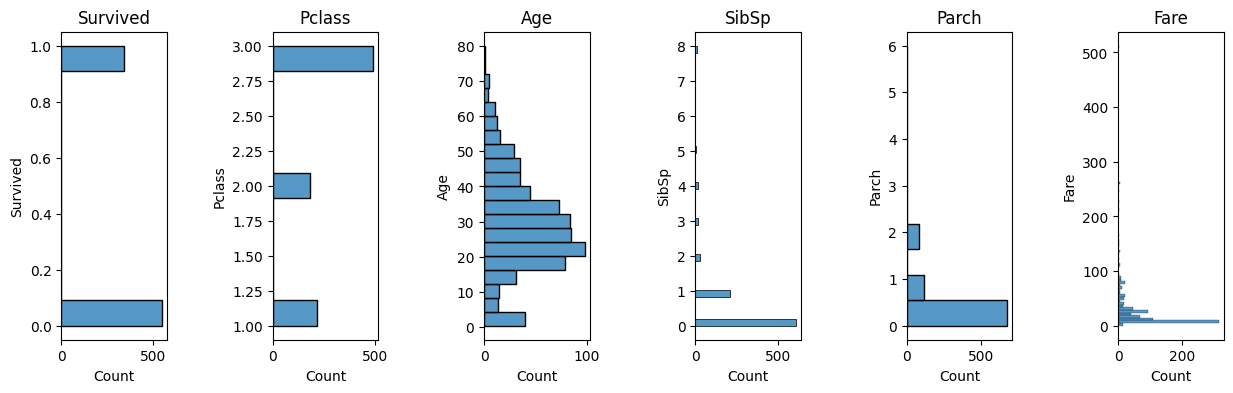

In [6]:
#| output: true
#| fig-cap: Distribution of Numeric Fields

# create a grid of axes
fig, axes = plt.subplots(nrows=1, ncols=len(num_columns), figsize=(15, 4), sharey=False)

# loop through the columns and create separate boxplots
for i, column in enumerate(num_columns):
    sns.histplot(data=df, y=column, ax=axes[i])
    axes[i].set_title(column)

# set the y-axis label
# fig.text(0, 0.5, 'Value', va='center', rotation='vertical')
fig.subplots_adjust(wspace=1) 
# display the plot
plt.show()

5) Explore relationship independent variables have on dependent variable.
    - Correlations
    - Predictive Power Scores

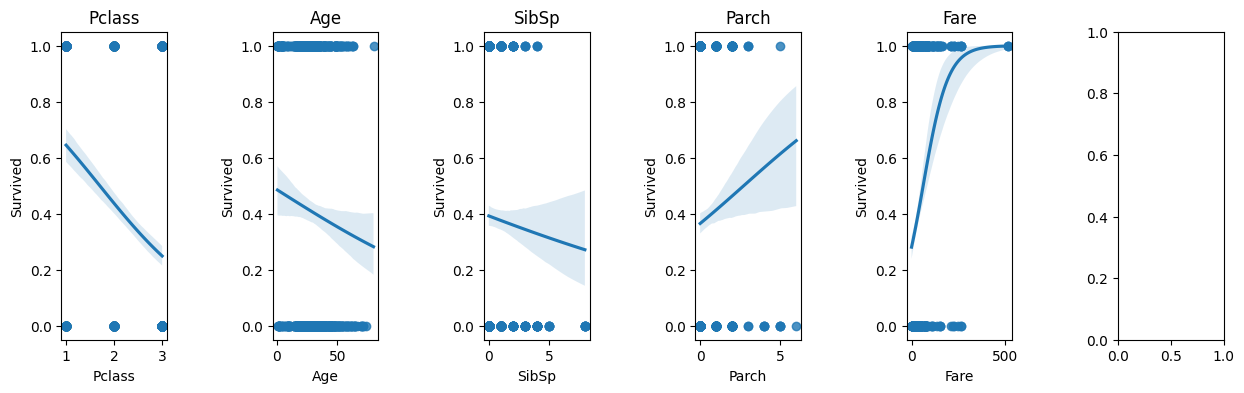

In [7]:
#| output: true
#| fig-cap: Relationship Between Numeric Fields and Target
#| fig-dpi: 150

# create a grid of axes
fig, axes = plt.subplots(nrows=1, ncols=len(num_columns), figsize=(15, 4), sharey=False)

# loop through the columns and create separate boxplots
for i, column in enumerate(num_columns[1:]):
    sns.regplot(data=df, y=target, x = column, ax=axes[i], logistic=True)
    axes[i].set_title(column)

# set the y-axis label
# fig.text(0, 0.5, 'Value', va='center', rotation='vertical')
fig.subplots_adjust(wspace=1)
# fig.dpi=100

plt.show()

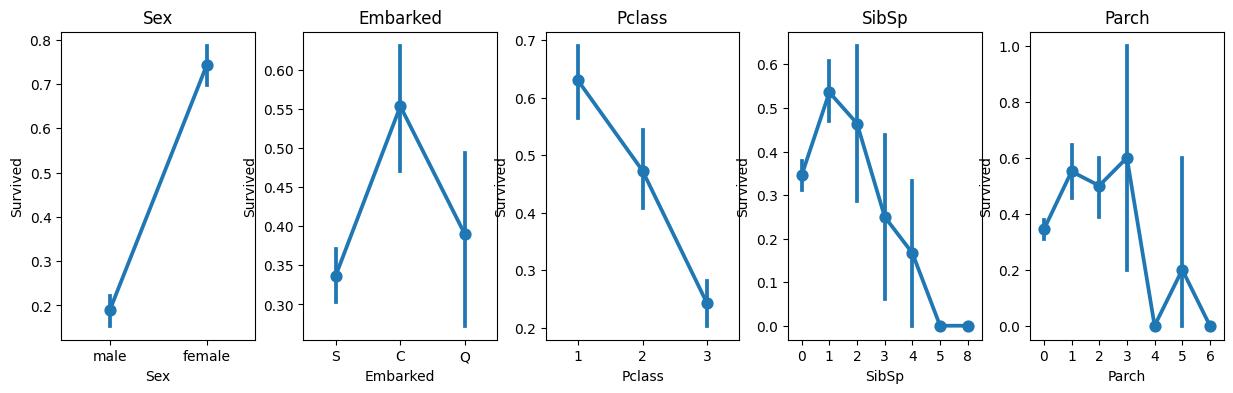

In [8]:
#| output: true
#| fig-cap: Relationship between Categorical Fields and Target

cat_columns_slcd = ['Sex', 'Embarked', 'Pclass', 'SibSp','Parch']

# create a grid of axes
fig, axes = plt.subplots(nrows=1, ncols=len(cat_columns_slcd), figsize=(15, 4), sharey=False)

# loop through the columns and create separate boxplots
for i, column in enumerate(cat_columns_slcd):
    # sns.violinplot(data=df, y=column, ax=axes[i])
    sns.pointplot(data=df, x=column, y=target, ax=axes[i])
    axes[i].set_title(column)

# set the y-axis label
# fig.text(0, 0.5, 'Value', va='center', rotation='vertical')
fig.subplots_adjust(wspace=.25) 
# display the plot
plt.show()

In [9]:
import plotly.io as pio
# pio.renderers.default = "png"

In [18]:
import hiplot as hiplot
hiplot.Experiment.from_dataframe(df).display()

<IPython.core.display.Javascript object>

In [10]:
#| output: true
#| fig-cap: Parallel categories plot with respect to target
fig = px.parallel_categories(df, dimensions=cat_columns_slcd, color=target)
fig.show()


In [11]:
#| output: true
#| fig-cap: Parallel coordinates plot with respect to target
fig = px.parallel_coordinates(data_frame=df, dimensions=num_columns, color=target)
fig.show()


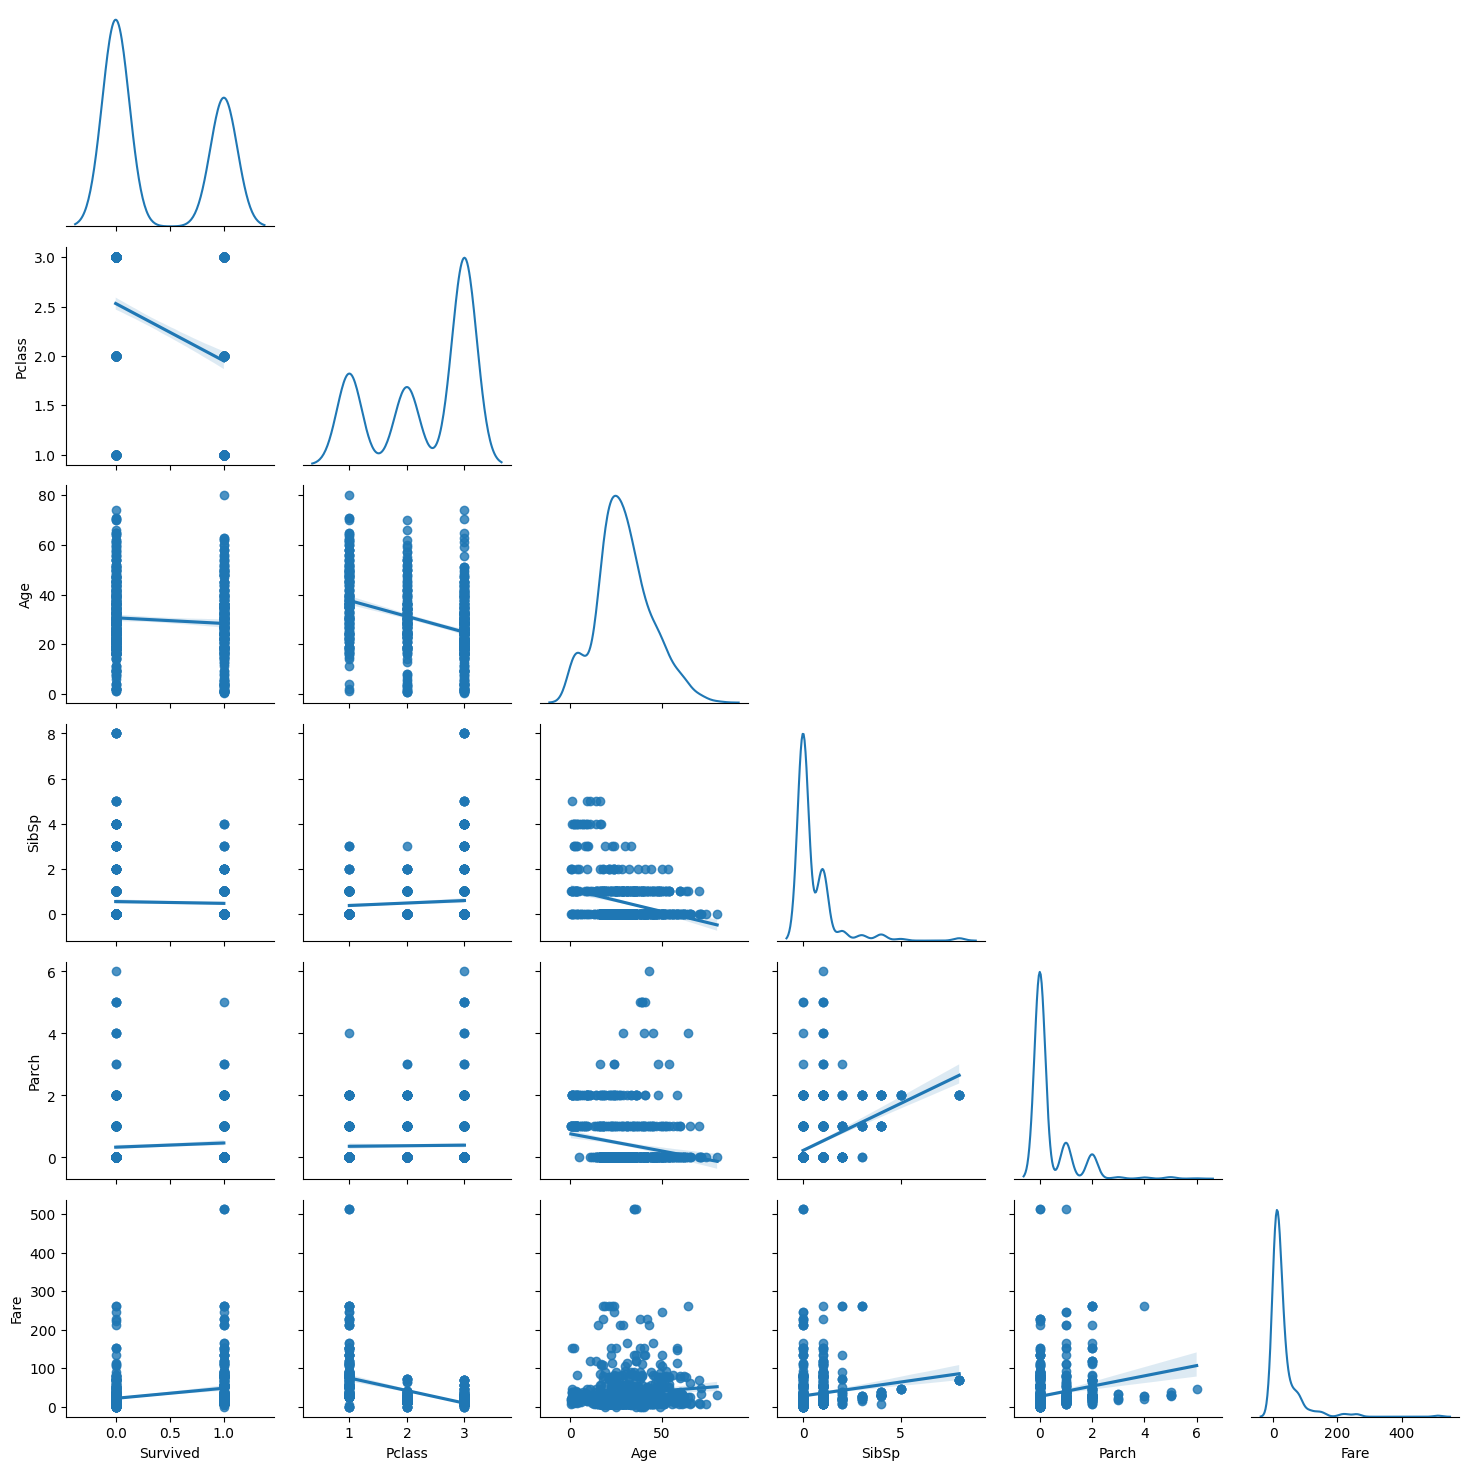

In [12]:
#| output: true
#| fig-cap: Relationships Between Numeric Fields

# create a pairplot to visualize the relationships between multiple numeric columns
g = sns.PairGrid(df, vars=num_columns, diag_sharey=False, corner=True)
g = g.map_lower(sns.regplot)
g = g.map_diag(sns.kdeplot)

# Feature Engineering
Should we remove outliers? manually impute nulls? handle high-value-count categories? handle date or time columns? convert data types?

Select a specific set of features and optionally re-name them.


# Model Selection
Run autoML to train the model. This can be for either regression or classification, but the focus her will be for regression and clustering

# Analysis of Feature Relationships

Calculate shap values for the model and visualize them with respect to each feature

Look at pair plot and parallel coordinates (plotly or hiplot)

# Model Tuning

# Model Validation and Testing


# Results


# Conclusion

# Appendix

# Example PDF Usage & Formatting

- Jupyter cell behaviour:

  - the following code can be added to the top of a cell to change how it renders in the PDF
  
  - toggle output
    - #| output: false
    - #| output: true 

  - Toggle code in output
    - #| echo: false (default)
    - #| echo: true

- add captions to an output
- #| fig-cap: caption for plot
- #| tbl-cap: caption for table


- [more documentation here](https://quarto.org/docs/reference/cells/cells-jupyter.html)

- Plotly visualization shortcuts code shortcuts:
  - px-fig - Create over 30 types of statistical and scientific graphics figures.
  - px-update - Update layout and data trace styling of existing figure.
  - px-args - Select arguments from lists of options to modify figure styling.

In [13]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
color_continuous_scale='aggrnyl'